In [6]:
import sys

sys.path.append( '../../' )
import analysis

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
t = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [8]:
def plot(temp, ax):
    averages = []
    for i in range(1,5):
        averages.append(analysis.read_fortran(f'{temp}{i}.dat', drop=True))

    singlecorrlist = [[] for _ in averages[1]]

    for average in averages:
        i=0
        for entry in average:
            singlecorrlist[i].append(entry)
            i+=1
    
    newdata = [analysis.average(singlecorr) for singlecorr in singlecorrlist]
    newerrors = [analysis.standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlist]

    ax.errorbar(t, newdata, newerrors, fmt='-.', label=f"T = {temp}", capsize=2)

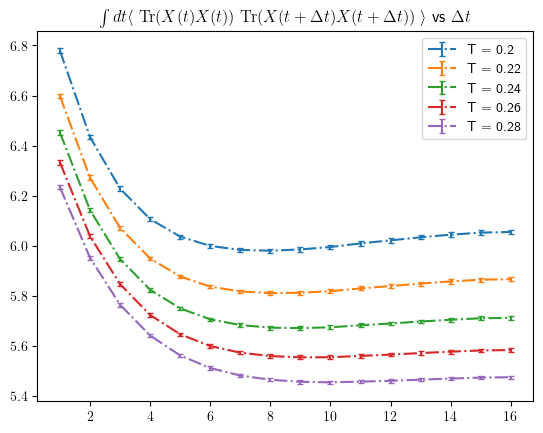

In [9]:
temps1 = [0.2, 0.22, 0.24, 0.26, 0.28]
_, ax = plt.subplots()
for temp in temps1:
    plot(temp, ax)
ax.legend(loc = 'best')
ax.set_title(r"$\int dt \langle ~\mathrm{Tr}(X(t)X(t)) ~ \mathrm{Tr}(X(t + \Delta t)X(t + \Delta t)) ~ \rangle$ vs $\Delta t$")
plt.savefig('temps_0.28-0.20.png')

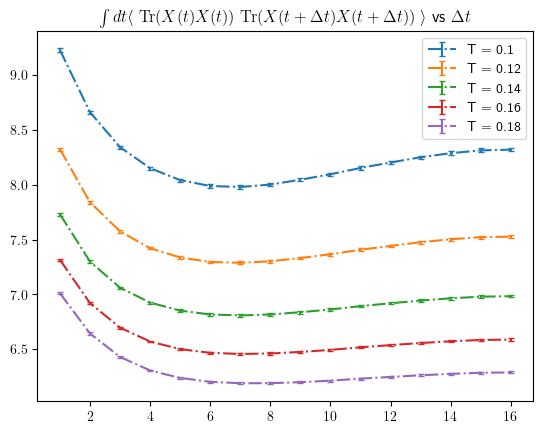

In [10]:
temps1 = [0.1, 0.12, 0.14, 0.16, 0.18]
_, ax = plt.subplots()
for temp in temps1:
    plot(temp, ax)
ax.legend(loc = 'best')
ax.set_title(r"$\int dt \langle ~\mathrm{Tr}(X(t)X(t)) ~ \mathrm{Tr}(X(t + \Delta t)X(t + \Delta t)) ~ \rangle$ vs $\Delta t$")
plt.savefig('temps_0.18-0.10.png')